In [1]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import pyplot

In [2]:
df =pd.read_csv('CTG_Stock_Data (1).csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-27,11717.867188,11856.540039,11648.53125,11717.867188,11717.867188,608510.0
1,2014-01-28,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-29,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-30,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-01-31,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2555,2023-12-08,27000.000000,27100.000000,26700.00000,26900.000000,26900.000000,4518900.0
2556,2023-12-11,26950.000000,27050.000000,26700.00000,26850.000000,26850.000000,2323100.0
2557,2023-12-12,26900.000000,27000.000000,26700.00000,27000.000000,27000.000000,3346200.0
2558,2023-12-13,27150.000000,27350.000000,26700.00000,26750.000000,26750.000000,3749800.0


In [3]:
data = df['Close'][::-1];
val= data.reset_index(drop=True);
val

0       26750.000000
1       26750.000000
2       27000.000000
3       26850.000000
4       26900.000000
            ...     
2555             NaN
2556             NaN
2557             NaN
2558             NaN
2559    11717.867188
Name: Close, Length: 2560, dtype: float64

In [4]:
# Create a date range starting from a specific date
start_date = '1/27/2014'
stop_date = '12/14/2023'
dates = pd.date_range(start=start_date, periods=len(val),freq='D')

In [5]:
# 2.  chia train test theo tỉ lệ 7:3
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
# Split the data into training, testing
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [6]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])


from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)


model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=24858.682, Time=1.83 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=24882.303, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=24877.855, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=24878.783, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=24881.083, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=24857.571, Time=1.43 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=24869.094, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=24855.704, Time=0.89 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=24857.829, Time=0.78 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=24868.165, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=24854.531, Time=0.35 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=24877.660, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=24876.747, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=24856.402, Time=0.63 sec
 ARIMA(1,1,2)(0,0,0

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [7]:
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

In [8]:
#Train all data to predict next 30 days.

last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)


x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)


y_next_30_days = model.predict(n_periods=len(x_next_30_days))

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)


Predicted closing prices for the next 30 days:
[23789.55074662 23782.70009323 23789.27978131 23782.96034099
 23789.02982718 23783.20040864 23788.79925498 23783.42186097
 23788.5865618  23783.62614145 23788.39036127 23783.81458162
 23788.20937451 23783.98840977 23788.04242182 23784.14875895
 23787.88841496 23784.29667434 23787.7463501  23784.43312008
 23787.61530123 23784.55898555 23787.49441414 23784.67509116
 23787.38290088 23784.78219372 23787.28003457 23784.88099134
 23787.18514472 23784.97212799]


Testing RMSE: 4684.719475469978
Testing MAPE: 0.13069932544303442
Testing MSLE: 0.029856435125207824


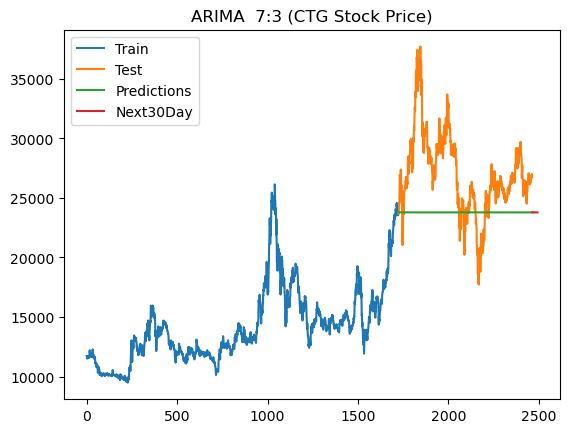

In [10]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, mean_absolute_percentage_error

# 7. Đánh giá độ chính xác test bằng RMSE, MAE , MAPE
# RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# Calculate MSLE
test_msle = mean_squared_log_error(y_test, y_pred)
print('Testing MSLE:', test_msle)
# 9.Vẽ hình
plt.title( 'ARIMA  7:3 (CTG Stock Price)')
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [11]:
test_data.index

RangeIndex(start=1725, stop=2464, step=1)